# Analysis of Antibiotics Prescription and Hospitalisation Risk

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
import glob
%matplotlib inline

In [5]:
#read csv.gz files and concatenate them
path = os.getcwd()+'\output\measures'
all_files = glob.glob(os.path.join(path, "*.csv.gz"))
print(path)

data = pd.concat((pd.read_csv(f) for f in all_files))
data

c:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit\output\measures


,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,sgss_positive,covrx1_dat,covrx2_dat,died_date,uti_date_1,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
0,2021-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,4,0,0,4,0,0,0,0,2894
1,2011-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,4,0,0,0,0,4,9523
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4765
3,2010-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,5803
4,2012-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,5,6,0,4,2312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,5,3,0,0,0,0,0,0,3503
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-27,NaN,...,0,0,0,0,0,0,0,0,0,402
997,2015-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,4,0,0,0,9650
998,2014-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,5,0,0,0,0,0,0,0,2683


In [6]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'sgss_positive', 'covrx1_dat', 'covrx2_dat',
       'died_date', 'uti_date_1', 'uti_date_2', 'uti_date_3', 'uti_date_4',
       'lrti_date_1', 'lrti_date_2', 'lrti_date_3', 'lrti_date_4', 'age',
       'age_cat', 'sex', 'practice', 'region', 'msoa', 'imd', 'bmi',
       'ethnicity', 'smoking_status', 'gp_count', 'flu_vaccine_tpp',
       'flu_vaccine', 'antibacterial_prescriptions',
       'broad_spectrum_antibiotics_prescriptions', 'primary_care_covid',
       'admitted', 'uti_counts', 'lrti_counts', 'uti_ab_count_1',
       'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4', 'lrti_ab_count_1',
       'lrti_ab_count_2', 'lrti_ab_count_3', 'lrti_ab_count_4', 'patient_id'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bmi_date_measured                         6408 non-null   object 
 1   smoking_status_date                       800 non-null    object 
 2   most_recent_unclear_smoking_cat_date      800 non-null    object 
 3   flu_vaccine_med                           800 non-null    object 
 4   flu_vaccine_clinical                      800 non-null    object 
 5   sgss_positive                             800 non-null    object 
 6   covrx1_dat                                0 non-null      float64
 7   covrx2_dat                                0 non-null      float64
 8   died_date                                 800 non-null    object 
 9   uti_date_1                                800 non-null    object 
 10  uti_date_2                           

In [8]:
data.describe(include='all')

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,sgss_positive,covrx1_dat,covrx2_dat,died_date,uti_date_1,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
count,6408,800,800,800,800,800,0.0,0.0,800,800,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
unique,141,34,34,13,7,541,NaN,NaN,278,535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-07,2020-05,2019-11,2018-12,2018-11,2019-10-30,NaN,NaN,2021-08-09,2021-05-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,64,37,33,84,142,5,NaN,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.900250,0.900500,0.895375,0.906125,0.901750,0.913000,0.906000,0.904875,0.899000,5025.727375
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.859767,1.857157,1.852797,1.867485,1.864077,1.884576,1.871991,1.870632,1.859968,2917.029638
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2478.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5049.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7612.250000


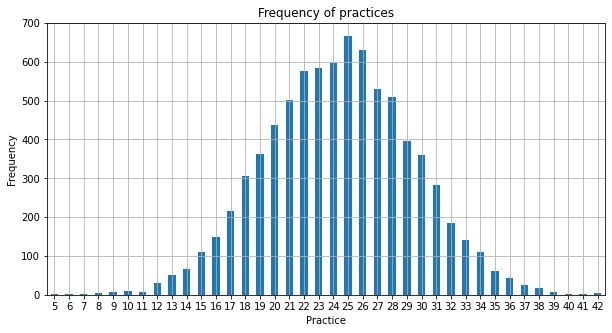

In [10]:
#data['practice'].value_counts().sort_index()

data['practice'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel('Practice')
plt.ylabel('Frequency')
plt.title('Frequency of practices')
#plt.xlim(0, 100)
plt.ylim(0, 700)
plt.grid()
plt.savefig(r'output/hospitalisation_risk/practices.png', edgecolor='none')
plt.show()

F    4110
M    3890
Name: sex, dtype: int64


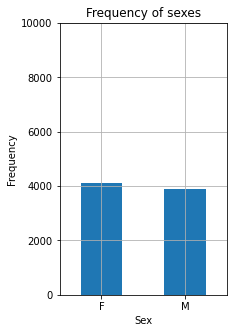

In [12]:
#data['sex'].value_counts().sort_index()

data['sex'].value_counts().sort_index().plot(kind='bar', figsize=(3, 5), rot=0)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Frequency of sexes')
#plt.xlim(0, 100)
plt.ylim(0, 10000)
plt.grid()
print(data['sex'].value_counts().sort_index())
plt.savefig(r'output/hospitalisation_risk/sexes.png', edgecolor='none')
plt.show()

0-4      956
15-24    877
25-34    843
35-44    921
45-54    853
5-14     850
55-64    934
65-74    877
75+      889
Name: age_cat, dtype: int64


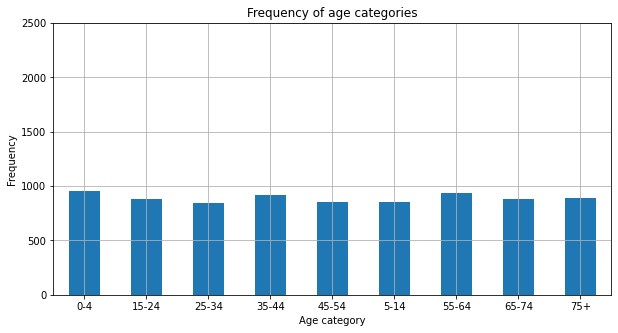

In [13]:
#data['age_cat'].value_counts().sort_index()

data['age_cat'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel('Age category')
plt.ylabel('Frequency')
plt.title('Frequency of age categories')
#plt.xlim(0, 100)
plt.ylim(0, 2500)
plt.grid()
print(data['age_cat'].value_counts().sort_index())
plt.savefig(r'output/hospitalisation_risk/age_categories.png', edgecolor='none')
plt.show()

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


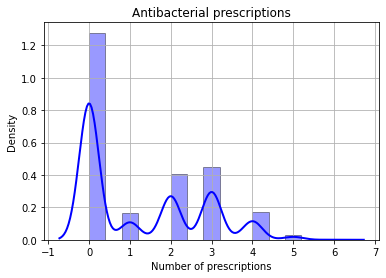

In [14]:
sns.distplot(data['antibacterial_prescriptions'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('Number of prescriptions')
#plt.ylabel('Frequency')
plt.title('Antibacterial prescriptions')
#plt.xlim(0, 100)
#plt.ylim(0, 1100)
plt.grid(True)
plt.savefig(r'output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
plt.show()

In [16]:
##data.groupby(['practice'])['population'].sum().plot(kind='bar', figsize=(10, 5))
#plt.ylim(0.5, 2)
##plt.xticks(rotation = 0, ha="right")
##plt.title("Population of each practice")
##plt.xlabel('Practice')
##plt.ylabel('Population')
##plt.grid()
##plt.savefig(r'output/hospitalisation_risk/antibacterial_prescirption_grouped_population.png', edgecolor='none')
##plt.show()

In [18]:
##sns.distplot(data['population'], hist=True, kde=True, 
##             bins=15, color = 'blue', 
##             hist_kws={'edgecolor':'black'},
##             kde_kws={'linewidth': 2})

##plt.xlabel('Population')
#plt.ylabel('Frequency')
##plt.title('Population in each practice')
#plt.xlim(0, 100)
#plt.ylim(0, 1100)
##plt.grid(True)
##plt.savefig(r'output/hospitalisation_risk/population.png', edgecolor='none')
##plt.show()